In [2]:
from pyrosm.data import sources
from pyrosm import get_data
from tqdm import tqdm
from pyrosm import OSM
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import sys

In [144]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
cities = ['Berlin', 'Paris', 'London', 'NewYorkCity', 'Seoul', \
          'Rostock', 'SanktPetersburg', 'Lima', 'Oslo', 'Prag']

In [39]:
available_cities = sources.cities.available
print(available_cities)

['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', 'Gent', '

In [40]:
for city in cities:
    if city in available_cities:
        print(f"{city} available")

Berlin available
Paris available
London available
NewYorkCity available
Seoul available
Rostock available
SanktPetersburg available
Lima available
Oslo available
Prag available


In [3]:
"""
for city in tqdm(cities):
    fp = get_data(city, directory="city_osm_data")
"""
fp = get_data("Flensburg", directory="city_osm_data")

In [104]:
print(fp)

/home/radtklau/Documents/Sentinel Building Segmentation/city_osm_data/Jena.osm.pbf


In [4]:
#filepath = "city_osm_data/Lima.osm.pbf"
osm = OSM(fp)

In [108]:
print(dir(osm))
print(osm.conf)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_current_timestamp', '_data_bounding_box', '_get_network_filter', '_get_pbf_elements', '_node_coordinates', '_nodes', '_nodes_gdf', '_osh_file', '_read_pbf', '_relations', '_set_current_time', '_timestamp_changed', '_verbose', '_way_records', 'allowed_bbox_types', 'bounding_box', 'conf', 'file_size', 'filepath', 'get_boundaries', 'get_buildings', 'get_data_by_custom_criteria', 'get_landuse', 'get_natural', 'get_network', 'get_pois', 'keep_node_info', 'to_graph']
<class 'pyrosm.config.Conf'>


In [119]:
buildings = osm.get_buildings()

In [5]:
boundaries = osm.get_boundaries()

In [98]:
b2 = osm.get_boundaries(name="Flensburg - Flensborg")

In [81]:
for index,row in b2.iterrows():
    print(row["geometry"].area)
    print(row["name"])

0.16269304459270476
Schleswig-Flensburg
0.007925538997369586
Flensburg - Flensborg
7.708639168413356e-05
Sender Flensburg-Jürgensby
0.00010992826537403744
Stützpunkt Flensburg-Mürwik


In [99]:
print(b2.iloc[0]["tags"])

{"alt_name:fo":"Flensburg","alt_name:ia":"Flensburgo","alt_name:is":"Flensburg","alt_name:ja":"\u30D5\u30EC\u30F3\u30B9\u30DC\u30FC","alt_name:la":"Flenopolis","coat_of_arms":"File:DEU Flensburg COA.svg","de:amtlicher_gemeindeschluessel":"01001000","de:place":"city","de:regionalschluessel":"010010000000","flag":"File:Flagge Flensburg.svg","int_name":"Flensburg","license_plate_code":"FL","name:ace":"Flensburg","name:af":"Flensburg","name:an":"Flensburg","name:ar":"\u0641\u0644\u0640\u0650\u0640\u0640\u0646\u0633\u0628\u0648\u0631\u063A","name:arc":"\u0726\u0720\u0722\u0723\u0712\u0718\u072A\u0713","name:az":"Flensburq","name:azb":"\u0641\u0644\u0646\u0633\u0628\u0648\u0631\u0642","name:be":"\u0424\u043B\u0435\u0301\u043D\u0441\u0431\u0443\u0440\u0433","name:bg":"\u0424\u043B\u0435\u043D\u0441\u0431\u0443\u0440\u0433","name:bn":"\u09AB\u09CD\u09B2\u09C7\u09A8\u09CD\u09B8\u09AC\u09C1\u09B0\u09CD\u0997","name:br":"Flensburg","name:ca":"Flensburg","name:ce":"\u0424\u043B\u0435\u043D\u0441\u

In [78]:
b2['name'].unique()

array(['Flensburg - Flensborg'], dtype=object)

In [56]:
print(b2.iloc[0]["name"])
print(b2.iloc[0]["geometry"].area)

Schleswig-Flensburg
0.16269304459270476


<Axes: >

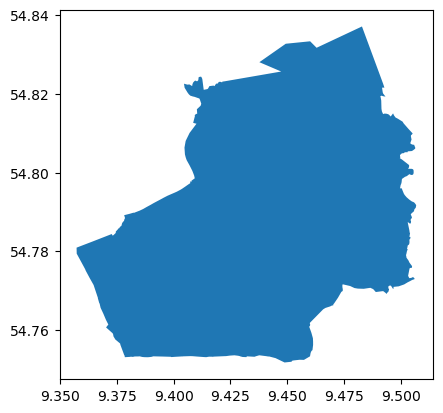

In [100]:
b2.plot()

In [20]:
b2['name'].unique()

array(['Schleswig-Flensburg', 'Flensburg - Flensborg',
       'Sender Flensburg-Jürgensby', 'Stützpunkt Flensburg-Mürwik'],
      dtype=object)

In [110]:
print(type(buildings))
print(dir(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__geo_interface__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__

In [111]:
buildings.to_file("Jena.shp", driver="GeoJSON")
bs = geopandas.read_file("Jena.shp")

<Axes: >

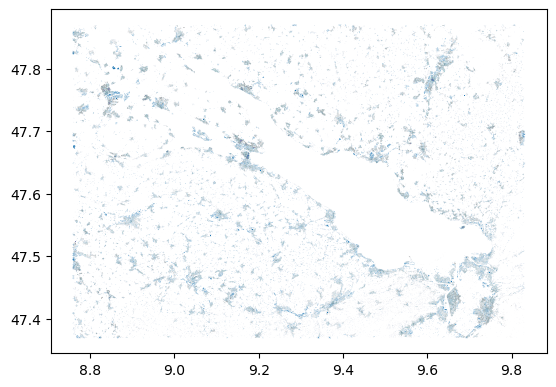

In [120]:
buildings.plot()

<Axes: >

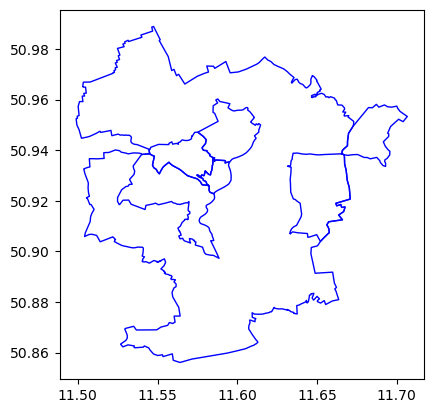

In [197]:
boundaries.plot(facecolor="none", edgecolor="blue")

In [10]:
boundaries.shape

boundaries_city = boundaries[boundaries['name']=="Flensburg - Flensborg"]
print("x")

x


In [8]:
boundary_coords = np.array(boundaries_city["geometry"].iloc[0].exterior.coords)
print(boundary_coords)

[[ 9.3586216  54.78123474]
 [ 9.3640976  54.782444  ]
 [ 9.37226009 54.78427887]
 ...
 [ 9.35735798 54.77941895]
 [ 9.3572979  54.78093719]
 [ 9.3586216  54.78123474]]


In [193]:
max_longitude_index = np.argmax(boundary_coords[:, 0])
max_longitude_point = boundary_coords[max_longitude_index]

# Find the point with the lowest longitude
min_longitude_index = np.argmin(boundary_coords[:, 0])
min_longitude_point = boundary_coords[min_longitude_index]

# Find the point with the highest latitude
max_latitude_index = np.argmax(boundary_coords[:, 1])
max_latitude_point = boundary_coords[max_latitude_index]

# Find the point with the lowest latitude
min_latitude_index = np.argmin(boundary_coords[:, 1])
min_latitude_point = boundary_coords[min_latitude_index]

print(f"max long: {max_longitude_point}, min long: {min_longitude_point}, max lat: {max_latitude_point}, min lat: {min_latitude_point}")

max long: [11.67299175 50.95140839], min long: [11.49895859 50.9524231 ], max lat: [11.54750729 50.98889923], min lat: [11.56408691 50.85607529]


Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

Text(0.5, 1.0, 'Scatter Plot of Coordinates with Extremes Highlighted')

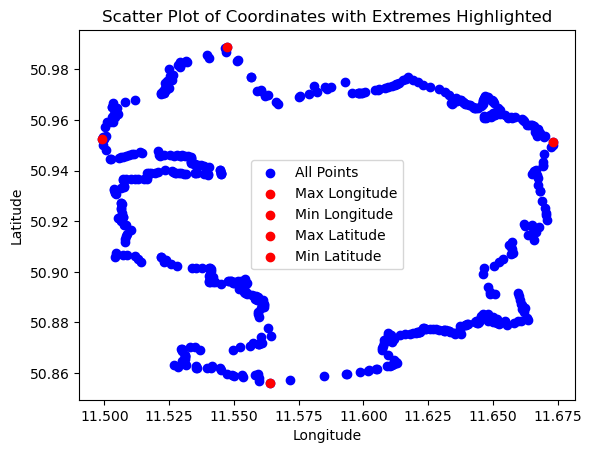

In [189]:
plt.scatter(boundary_coords[:, 0], boundary_coords[:, 1], label='All Points', color='blue')

# Highlight the points with the highest and lowest longitude and latitude in red
plt.scatter(max_longitude_point[0], max_longitude_point[1], color='red', label='Max Longitude')
plt.scatter(min_longitude_point[0], min_longitude_point[1], color='red', label='Min Longitude')
plt.scatter(max_latitude_point[0], max_latitude_point[1], color='red', label='Max Latitude')
plt.scatter(min_latitude_point[0], min_latitude_point[1], color='red', label='Min Latitude')

# Add labels and title for better understanding
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Coordinates with Extremes Highlighted')
plt.legend()

# Display the plot
plt.show()

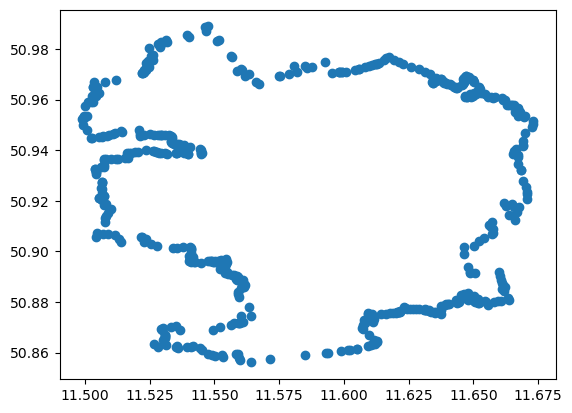

In [190]:
x_coords, y_coords = zip(*boundary_coords)
plt.scatter(x_coords,y_coords)

In [202]:
print(boundaries_city.columns)

Index(['visible', 'admin_level', 'boundary', 'id', 'timestamp', 'version',
       'geometry', 'tags', 'osm_type', 'name', 'ref', 'website', 'border_type',
       'changeset'],
      dtype='object')


<Axes: >

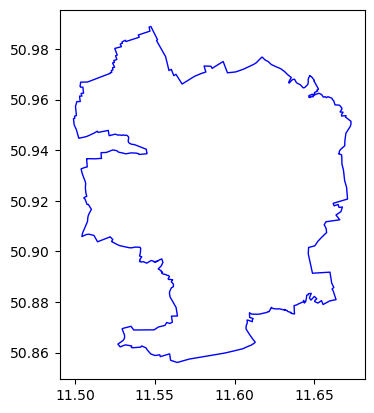

In [203]:
boundaries_city.plot(facecolor="none", edgecolor="blue")

In [210]:
print(boundaries_city['geometry'].values[0])

POLYGON ((11.50306224822998 50.96495819091797, 11.503459930419922 50.966888427734375, 11.507770538330078 50.966941833496094, 11.511846542358398 50.96792221069336, 11.521980285644531 50.97037124633789, 11.521944999694824 50.970550537109375, 11.522418022155762 50.97067642211914, 11.522990226745605 50.97077178955078, 11.522951126098633 50.97084045410156, 11.522706031799316 50.97148895263672, 11.5228910446167 50.97153854370117, 11.523674011230469 50.97175598144531, 11.523502349853516 50.97261428833008, 11.52474308013916 50.9727783203125, 11.52408504486084 50.97367477416992, 11.523502349853516 50.97447967529297, 11.524713516235352 50.97470474243164, 11.524243354797363 50.97542953491211, 11.52615737915039 50.975830078125, 11.525385856628418 50.97732925415039, 11.526397705078125 50.97761535644531, 11.524860382080078 50.980224609375, 11.529027938842773 50.98091125488281, 11.528279304504395 50.9819450378418, 11.529654502868652 50.98228073120117, 11.529367446899414 50.982784271240234, 11.5314970

In [7]:
osm_bd = OSM(fp, bounding_box=boundaries_city['geometry'].values[0])

In [8]:
bbox_buildings = osm_bd.get_buildings()

<Axes: >

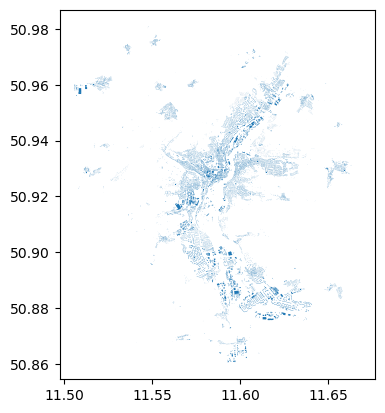

In [9]:
bbox_buildings.plot()
#now i need satellite data

In [18]:
print(type(bbox_buildings))
print(bbox_buildings.columns)
print(sys.getsizeof(bbox_buildings))
polygon_building_data = bbox_buildings["geometry"]
print(type(polygon_building_data))
print(sys.getsizeof(polygon_building_data))
print(polygon_building_data)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:housename',
       'addr:postcode', 'addr:place', 'addr:street', 'email', 'name',
       'opening_hours', 'operator', 'phone', 'ref', 'url', 'visible',
       'website', 'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'building:min_level', 'building:use', 'craft',
       'height', 'internet_access', 'landuse', 'office', 'shop', 'source',
       'start_date', 'wikipedia', 'id', 'timestamp', 'version', 'tags',
       'osm_type', 'geometry', 'changeset'],
      dtype='object')
24312531
<class 'geopandas.geoseries.GeoSeries'>
189028
0        POLYGON ((11.59805 50.86757, 11.59807 50.86739...
1        POLYGON ((11.57817 50.89959, 11.57823 50.89960...
2        POLYGON ((11.57383 50.89596, 11.57423 50.89606...
3        POLYGON ((11.57934 50.90129, 11.57959 50.90131...
4        POLYGON ((11.58753 50.92908, 11.58753 50.92904...
                      

In [48]:
print(bbox_buildings.iloc[0]["wikipedia"])

None


POLYGON ((11.598052024841309 50.86756896972656, 11.598068237304688 50.867393493652344, 11.598467826843262 50.867408752441406, 11.598448753356934 50.86750793457031, 11.59821605682373 50.86749267578125, 11.5982084274292 50.86757278442383, 11.598052024841309 50.86756896972656))


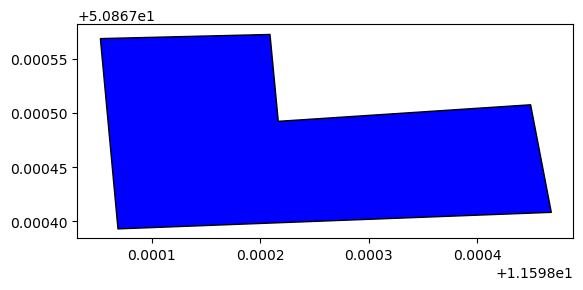

In [33]:
fig, ax = plt.subplots()

polygon_building_data[0:1].plot(ax=ax, color='blue', edgecolor='black')
print(polygon_building_data[0])

ax.set_aspect('equal')

plt.show()